<a href="https://colab.research.google.com/github/Agneya-1BM22CS024/ML_Lab/blob/main/1BM22CS024_Lab_3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('/content/HR_comma_sep.csv')
print(df)
print(df.isna().sum())
# plt.scatter(df1.age,df1.bought_insurance,marker='+',color='red')

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

<Axes: >

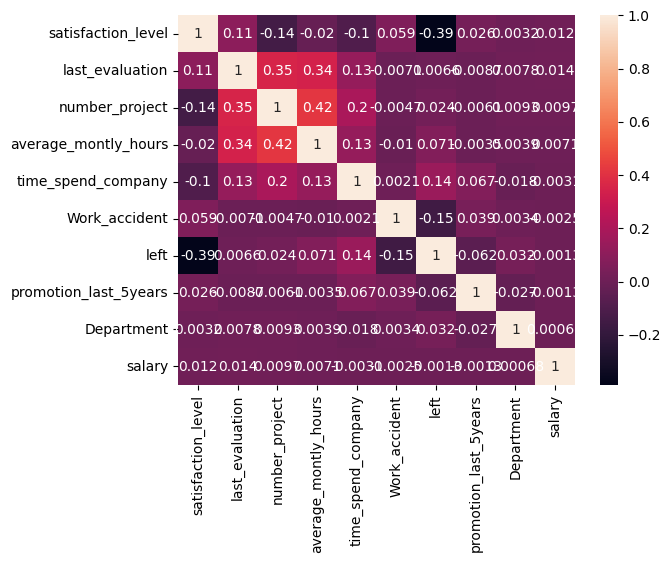

In [20]:
import seaborn as sns
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['salary'] = le.fit_transform(df['salary'])
sns.heatmap(df.corr(),annot=True)

<BarContainer object of 3 artists>

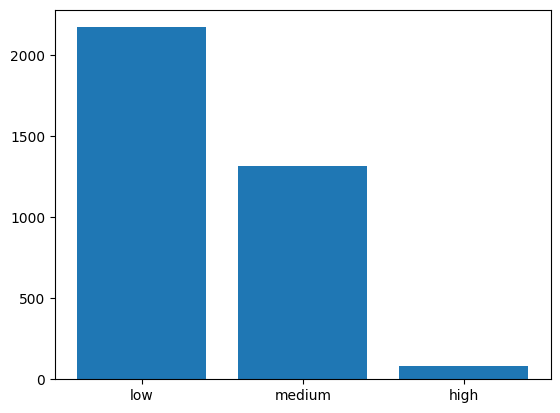

In [18]:
plt.bar(['low','medium','high'],[df[df['salary']=='low']['left'].sum(),df[df['salary']=='medium']['left'].sum(),df[df['salary']=='high']['left'].sum()])

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['salary']],df.left,test_size=0.2)

model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

print("coef: ",model.coef_)
print("intercept: ",model.intercept_)

coef:  [[-0.02569115]]
intercept:  [-1.10719064]


In [23]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predicted)
print("Root Mean Squared Error:", mae)

Root Mean Squared Error: 0.22233333333333333


**Question 2**

In [38]:
df2 = pd.read_csv('/content/zoo-data.csv')
print(df2.head())
print(df2.isnull().sum())

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

In [39]:
le = preprocessing.LabelEncoder()
df2_x = df2.drop(columns=['animal_name','class_type'],axis='column')

In [40]:
model2 = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(df2_x,df2['class_type'],test_size=0.2)
model2.fit(X_train, Y_train)
Y_predicted = model2.predict(X_test)
print("Coef: ",model2.coef_)
print("Intercept: ",model2.intercept_)

Coef:  [[ 1.17526552e+00 -2.66678127e-01 -1.25010110e+00  1.48606608e+00
  -1.52535015e-01 -1.51597071e-01  3.90595998e-02  5.24570992e-01
   2.78299028e-01  2.92416106e-01 -1.83825962e-01  9.81391004e-02
   1.24013002e-02  1.80705625e-01  1.34390508e-01  6.90901272e-01]
 [-2.46831206e-01  1.54359619e+00  1.90130062e-01 -2.35292523e-01
   9.18154553e-01 -8.12991670e-03  1.17577710e-01 -8.51153740e-01
   4.46356871e-01  3.15829018e-01 -1.11087212e-01 -2.81550628e-01
  -2.52667719e-01  5.49343209e-01  3.46824263e-02  6.87932108e-02]
 [-3.86034475e-01 -4.94771600e-01  3.83817044e-01 -3.82360647e-01
  -4.21021981e-01 -8.41952084e-01  1.34954306e-01  2.51726415e-01
   3.75886679e-01  2.92321573e-01 -1.37446701e-01 -2.64997360e-01
  -2.37246467e-02  5.83449416e-01 -1.06947335e-01  1.38120740e-01]
 [-9.87666036e-02 -1.73522764e-01  2.76572664e-01 -2.80553645e-01
  -1.36453803e-01  5.88395818e-01 -7.46322811e-02  4.91610916e-01
   3.04520188e-01 -9.83867143e-01 -1.17202867e-03  8.63888721e-01


In [41]:
err = mean_absolute_error(Y_test, Y_predicted)
print("Mean absolute error: ",err)

Mean absolute error:  0.047619047619047616


<Axes: >

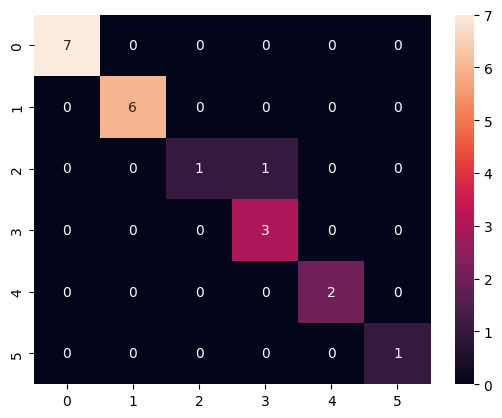

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predicted)
sns.heatmap(cm,annot=True)
